# Introdução aos métodos discretos

Nome: Ana Beatriz

# Lista 10
Seja o seguinte problema de valor de contorno:
\begin{equation}
u''(x) - 4u(x) = 4x,\hspace{1cm} 0 \leqslant x \leqslant 1 \\
\end{equation}
sujeito às seguintes condições de contorno
\begin{equation*}
u(0) = u(1) = 0,
\end{equation*}
cuja solução exata é
\begin{equation*}
u(x) = \frac{e^{2x} - e^{-2x}}{e^2 - e^{-2}} - x.
\end{equation*}

### 1) Resolva o problema usando o método dos momentos com $N=3$. 

(a) Apresente as funções bases da solução aproximada e as funções de ponderação.

Funções de base da solução
$ϕ_j = x^j(1-x)$\
$\phi_1 = x-x²$\
$\phi_2 = x²-x³$\
$\phi_3 = x³-x⁴$\
$ũ(x) = \alpha_1\phi_1 +\alpha_2\phi_2+\alpha_3\phi_3$

Funções de ponderação\
$ω_i = x^{i-1}$\
$\omega_1 = 1$\
$\omega_2 = x$\
$\omega_3 = x²$


(b) Apresente a matriz $\mathbf{A}$ e o vetor $\mathbf{b}$ do sistema linear resultante.

$𝓛[\phi_1] = -2-4x+4x² $\
$𝓛[\phi_2] = 2-6x-4x²+4x³ $\
$𝓛[\phi_3] = \frac{d²}{dx²}(x³-x⁴)-4(x³-x⁴) = 6x - 12x² - 4x³ +4 x⁴ $


Assim, os termos $A_{ij}$ são:\
$A_{11} = -\frac{8}{3} $\
$A_{12} = -\frac{4}{3} $\
$A_{21} = -\frac{4}{3} $\
$A_{22} = -\frac{6}{5} $\
$A_{13} = \int_0^1 1(6x - 12x² - 4x³ +4 x⁴)dx$\
$A_{23} = \int_0^1 x(6x - 12x² - 4x³ +4 x⁴)dx$\
$A_{31} = \int_0^1 x²(-2-4x+4x²)dx$\
$A_{32} = \int_0^1 x²(2-6x-4x²+4x³)dx$\
$A_{33} = \int_0^1 x²(6x - 12x² - 4x³ +4 x⁴)dx$

Os termos $b_i$ são:\
$b_1 = 2$\
$b_2 = \frac{4}{3}$\
$b_3 = \int_0^1 x²(4x)dx$


In [1]:
import numpy as np
import sympy as sy

def A13(x):
  return 6*x-12*x**2-4*x**3+4*x**4
def A23(x):
  return x*(6*x-12*x**2-4*x**3+4*x**4)
def A31(x):
  return (x**2)*(-2-4*x+4*x**2)
def A32(x):
  return (x**2)*(2-6*x-4*x**2+4*x**3)
def A33(x):
  return (x**2)*(6*x-12*x**2-4*x**3+4*x**4)
def B3(x):
  return (x**2)*4*x

x = sy.Symbol("x")
A1 = np.zeros([3,3])
A1[0,0] = -8/3
A1[0,1] = -4/3
A1[0,2] = sy.integrate(A13(x),(x,0,1))
A1[1,0] = -4/3
A1[1,1] = -6/5
A1[1,2] = sy.integrate(A23(x),(x,0,1))
A1[2,0] = sy.integrate(A31(x),(x,0,1))
A1[2,1] = sy.integrate(A32(x),(x,0,1))
A1[2,2] = sy.integrate(A33(x),(x,0,1))

print("Matriz A:\n")
print(A1)

B1 = np.zeros(3)
B1[0] = 2
B1[1] = 4/3
B1[2] = sy.integrate(B3(x),(x,0,1))

print("Matriz B:\n")
print(B1)

alpha1 = np.linalg.solve(A1,B1)
print("Coeficientes alfa:\n")
print(alpha1)

Matriz A:

[[-2.66666667 -1.33333333 -1.2       ]
 [-1.33333333 -1.2        -1.13333333]
 [-0.86666667 -0.96666667 -0.9952381 ]]
Matriz B:

[2.         1.33333333 1.        ]
Coeficientes alfa:

[-0.4490894  -0.39321192 -0.23178808]


(c) Plote o gráfico da solução aproximada em comparação ao gráfico da solução exata.

In [2]:
def Exata(a):
  return (np.exp(2*a)-np.exp(-2*a))/(np.exp(2)-np.exp(-2))-a

def phi1(a):
  return a-a**2

def phi2(a):
  return a**2-a**3

def phi3(a):
  return a**3-a**4

a = np.linspace(0,1,1000) #Domínio

aprox1 = alpha1[0]*phi1(a)+alpha1[1]*phi2(a)+alpha1[2]*phi3(a)

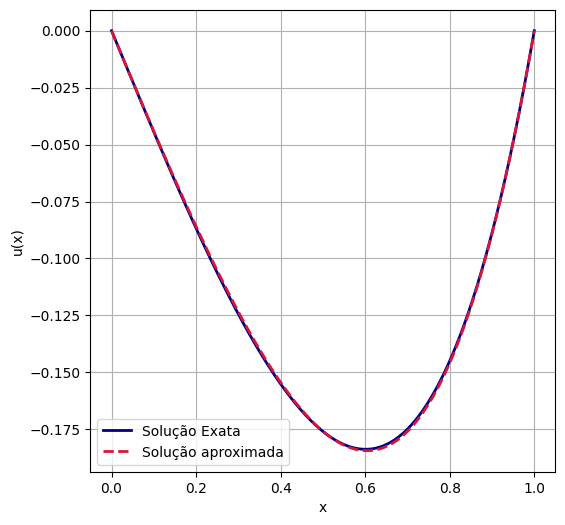

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=[6,6])
plt.plot(a,Exata(a),label="Solução Exata",linewidth=2,color='navy')
plt.plot(a,aprox1,label="Solução aproximada", color='crimson',linewidth=2,linestyle='--')
plt.legend()
plt.ylabel('u(x)')
plt.xlabel('x')
plt.grid()
plt.show()

(d) Plote o gráfico do resíduo.

$𝓛[ũ(x)] = \frac{d²}{dx²}(\alpha_1(x-x^2) +\alpha_2(x^2-x^3)+\alpha_3(x^3-x^4)-4(\alpha_1(x-x^2) +\alpha_2(x^2-x^3)+\alpha_3(x^3-x^4) $

$𝓔(x) =  $𝓛[ũ(x)] - f(x) $

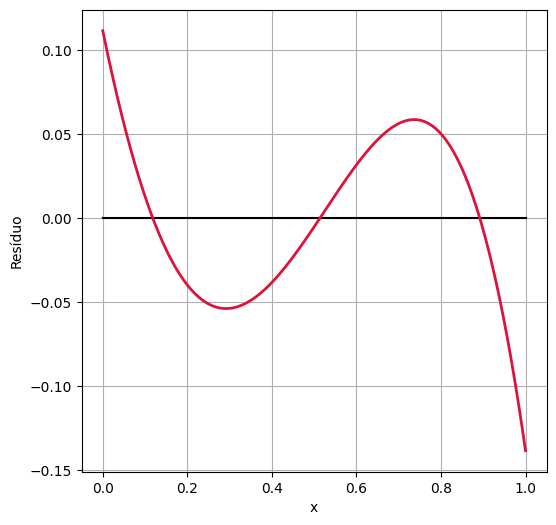

In [4]:
def dphi1(a):
  return -2

def dphi2(a):
  return 2-6*a

def dphi3(a):
  return 6*a-12*a**2

residuo1 = alpha1[0]*dphi1(a)+alpha1[1]*dphi2(a)+alpha1[2]*dphi3(a)-4*aprox1 - 4*a
plt.figure(figsize=[6,6])
plt.plot(a,np.zeros(len(a)),color='black')
plt.plot(a,residuo1,linewidth=2,color='crimson')
plt.ylabel('Resíduo')
plt.xlabel('x')
plt.grid()
plt.show()

### 2) Resolva o problema usando o método da Colocação com $N=3$ e os seguintes pontos $\xi_1 = 0.25$, $\xi_2 = 0.5$ e $\xi_3 = 0.75$.

(a) Apresente as funções bases da solução aproximada e as funções de ponderação.

Funções de base da solução
$ϕ_j = x^j(1-x)$\
$\phi_1 = x-x²$\
$\phi_2 = x²-x³$\
$\phi_3 = x³-x⁴$\
$ũ(x) = \alpha_1\phi_1 +\alpha_2\phi_2+\alpha_3\phi_3$

Funções de ponderação\
$ω_i = δ(x-\xi_i)$ \
$\omega_1 = δ(x-\xi_1) = δ(x-0.25)$\
$\omega_2 = δ(x-\xi_2) = δ(x-0.5)$\
$\omega_3 = δ(x-\xi_3) = δ(x-0.75)$

(b) Apresente a matriz $\mathbf{A}$ e o vetor $\mathbf{b}$ do sistema linear resultante.

In [5]:
def L1(x):
  return -2-4*x+4*x**2

def L2(x):
  return 2-6*x-4*x**2+4*x**3

def L3(x):
  return 6*x-12*x**2-4*x**3+4*x**4

A2 = np.zeros([3,3])
B2 = np.zeros(3)

Csi = np.array([0.25,0.5,0.75])


for i in range(3):
  B2[i] = 4*Csi[i]
  for j in range(3):
    if j==0:
      A2[i,j] = L1(Csi[i])
    elif j==1:
      A2[i,j] = L2(Csi[i])
    else:
      A2[i,j] = L3(Csi[i])
    
print("Matriz A:\n")
print(A2)

print("Matriz B:\n")
print(B2)

alpha2 = np.linalg.solve(A2,B2)
print("Coeficientes alfa:\n")
print(alpha2)

Matriz A:

[[-2.75      0.3125    0.703125]
 [-3.       -1.5      -0.25    ]
 [-2.75     -3.0625   -2.671875]]
Matriz B:

[1. 2. 3.]
Coeficientes alfa:

[-0.46232439 -0.37190294 -0.22068966]


(c) Plote o gráfico da solução aproximada em comparação ao gráfico da solução exata.

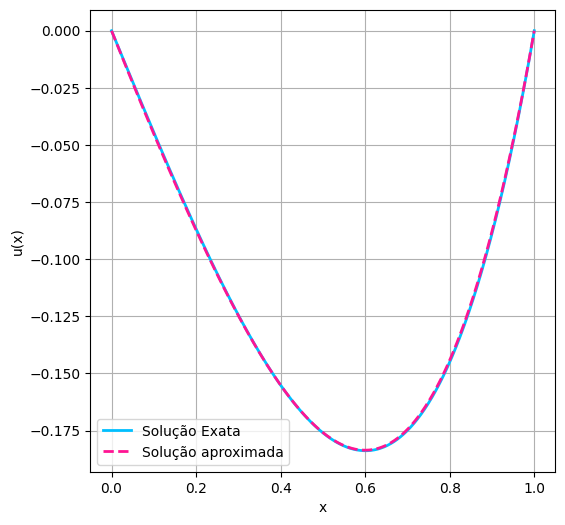

In [6]:
aprox2 = alpha2[0]*phi1(a)+alpha2[1]*phi2(a)+alpha2[2]*phi3(a)

plt.figure(figsize=[6,6])
plt.plot(a,Exata(a),label="Solução Exata",linewidth=2,color='deepskyblue')
plt.plot(a,aprox2,label="Solução aproximada", color='deeppink',linewidth=2,linestyle='--')
plt.legend()
plt.ylabel('u(x)')
plt.xlabel('x')
plt.grid()
plt.show()

(d) Plote o gráfico do resíduo.

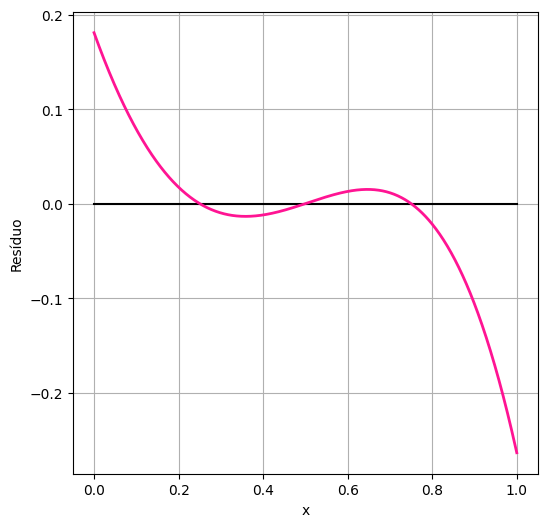

In [7]:
residuo2 = alpha2[0]*dphi1(a)+alpha2[1]*dphi2(a)+alpha2[2]*dphi3(a)-4*aprox2 - 4*a
plt.figure(figsize=[6,6])
plt.plot(a,np.zeros(len(a)),color='black')
plt.plot(a,residuo2,linewidth=2,color='deeppink')
plt.ylabel('Resíduo')
plt.xlabel('x')
plt.grid()
plt.show()

### 3) Resolva o problema usando o método de Galerkin com $N=3$. 

(a) Apresente as funções bases da solução aproximada e as funções de ponderação.

Funções de base da solução
$ϕ_j = x^j(1-x)$\
$\phi_1 = x-x²$\
$\phi_2 = x²-x³$\
$\phi_3 = x³-x⁴$\
$ũ(x) = \alpha_1\phi_1 +\alpha_2\phi_2+\alpha_3\phi_3$

Funções de ponderação\
$ω_i = δ(x-\xi_i)$ \
$\omega_1 = \phi_1 = x-x²$\
$\omega_2 = \phi_2 = x²-x³$\
$\omega_3 = \phi_3 = x³-x⁴$

(b) Apresente a matriz $\mathbf{A}$ e o vetor $\mathbf{b}$ do sistema linear resultante.

Assim, os termos $A_{ij}$ são:\
$A_{11} = -\frac{7}{15} $\
$A_{12} = -\frac{7}{30} $\
$A_{21} = -\frac{7}{30} $\
$A_{22} = -\frac{6}{35} $\
$A_{13} = \int_0^1 (x-x^2)(6x - 12x² - 4x³ +4 x⁴)dx$\
$A_{23} = \int_0^1 (x^2-x^3)(6x - 12x² - 4x³ +4 x⁴)dx$\
$A_{31} = \int_0^1 (x^3-x^4)(-2-4x+4x²)dx$\
$A_{32} = \int_0^1 (x^3-x^4)(2-6x-4x²+4x³)dx$\
$A_{33} = \int_0^1 (x^3-x^4)(6x - 12x² - 4x³ +4 x⁴)dx$

Os termos $b_i$ são:\
$b_1 = \frac{1}{3}$\
$b_2 = -\frac{1}{5}$\
$b_3 = \int_0^1 (x^3-x^4)(4x)dx$

In [12]:
import numpy as np
import sympy as sy

def A13_g(x):
  return (x-x**2)*(6*x-12*x**2-4*x**3+4*x**4)
def A23_g(x):
  return (x**2-x**3)*(6*x-12*x**2-4*x**3+4*x**4)
def A31_g(x):
  return (x**3-x**4)*(-2-4*x+4*x**2)
def A32_g(x):
  return (x**3-x**4)*(2-6*x-4*x**2+4*x**3)
def A33_g(x):
  return (x**3-x**4)*(6*x-12*x**2-4*x**3+4*x**4)
def B3_g(x):
  return (x**3-x**4)*4*x

A3 = np.zeros([3,3])
A3[0,0] = -7/15
A3[0,1] = -7/30
A3[0,2] = sy.integrate(A13_g(x),(x,0,1))
A3[1,0] = -7/30
A3[1,1] = -6/35
A3[1,2] = sy.integrate(A23_g(x),(x,0,1))
A3[2,0] = sy.integrate(A31_g(x),(x,0,1))
A3[2,1] = sy.integrate(A32_g(x),(x,0,1))
A3[2,2] = sy.integrate(A33_g(x),(x,0,1))

print("Matriz A:\n")
print(A3)

B3 = np.zeros(3)
B3[0] = 1/3
B3[1] = 1/5
B3[2] = sy.integrate(B3_g(x),(x,0,1))

print("Matriz B:\n")
print(B3)

alpha3 = np.linalg.solve(A3,B3)
print("Coeficientes alfa:\n")
print(alpha3)

Matriz A:

[[-0.46666667 -0.23333333 -0.13809524]
 [-0.23333333 -0.17142857 -0.12380952]
 [-0.13809524 -0.12380952 -0.1015873 ]]
Matriz B:

[0.33333333 0.2        0.13333333]
Coeficientes alfa:

[-0.45652174 -0.38043478 -0.22826087]


(c) Plote o gráfico da solução aproximada em comparação ao gráfico da solução exata.

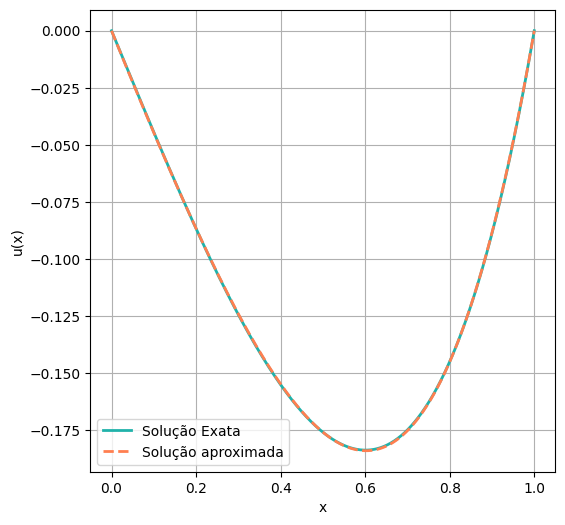

In [13]:
aprox3 = alpha3[0]*phi1(a)+alpha3[1]*phi2(a)+alpha3[2]*phi3(a)

plt.figure(figsize=[6,6])
plt.plot(a,Exata(a),label="Solução Exata",linewidth=2,color='lightseagreen')
plt.plot(a,aprox3,label="Solução aproximada", color='coral',linewidth=2,linestyle='--')
plt.legend()
plt.ylabel('u(x)')
plt.xlabel('x')
plt.grid()
plt.show()

(d) Plote o gráfico do resíduo.

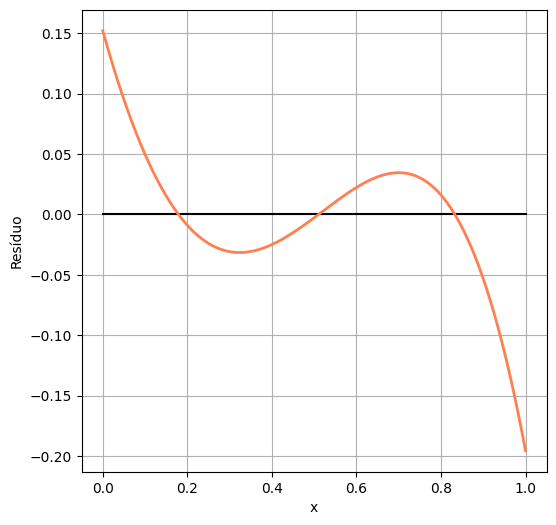

In [15]:
residuo3 = alpha3[0]*dphi1(a)+alpha3[1]*dphi2(a)+alpha3[2]*dphi3(a)-4*aprox3 - 4*a
plt.figure(figsize=[6,6])
plt.plot(a,np.zeros(len(a)),color='black')
plt.plot(a,residuo3,linewidth=2,color='coral')
plt.ylabel('Resíduo')
plt.xlabel('x')
plt.grid()
plt.show()

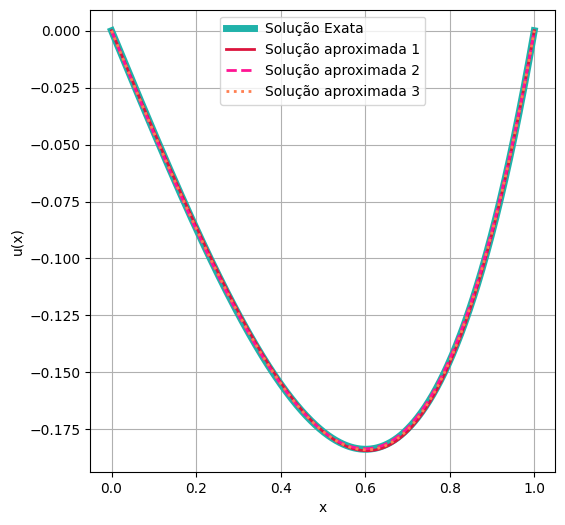

In [32]:
#Todas as aproximadas juntas

plt.figure(figsize=[6,6])
plt.plot(a,Exata(a),label="Solução Exata",linewidth=5,color='lightseagreen')
plt.plot(a,aprox1,label="Solução aproximada 1", color='crimson',linewidth=2)
plt.plot(a,aprox2,label="Solução aproximada 2", color='deeppink',linewidth=2,linestyle='dashed')
plt.plot(a,aprox3,label="Solução aproximada 3", color='coral',linewidth=2,linestyle='dotted')
plt.legend()
plt.ylabel('u(x)')
plt.xlabel('x')
plt.grid()
plt.show()

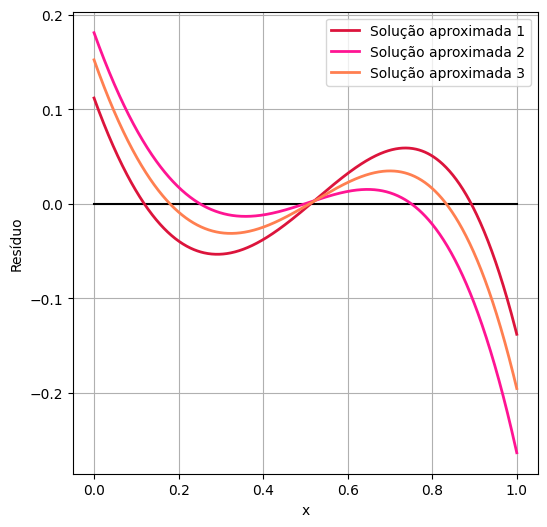

In [30]:
#Todos os resíduos
plt.figure(figsize=[6,6])
plt.plot(a,np.zeros(len(a)),color='black')
plt.plot(a,residuo1,linewidth=2,color='crimson',label="Solução aproximada 1")
plt.plot(a,residuo2,linewidth=2,color='deeppink',label="Solução aproximada 2")
plt.plot(a,residuo3,linewidth=2,color='coral',label="Solução aproximada 3")
plt.ylabel('Resíduo')
plt.xlabel('x')
plt.legend()
plt.grid()
plt.show()